In [1]:
import pandas as pd
import numpy as np

In [2]:
# 1
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# 3
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
df.shape

(201, 29)

In [6]:
# 4
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [7]:
# 5
df.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

In [8]:
# 6
df['peak-rpm'].dtype

dtype('float64')

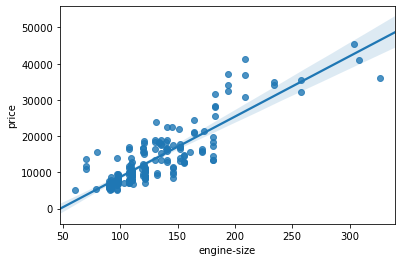

In [9]:
# 7
sns.regplot(df['engine-size'], df['price'])

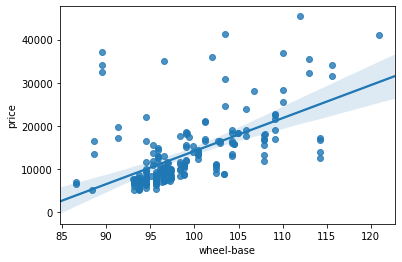

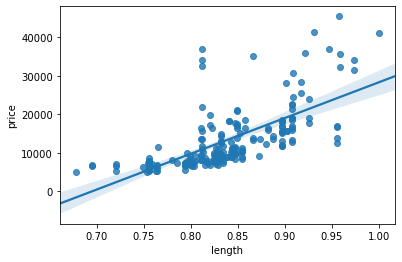

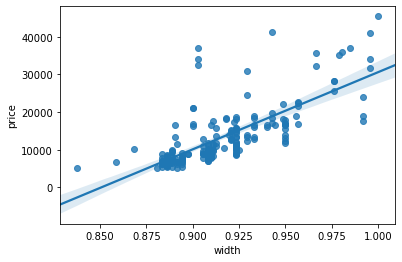

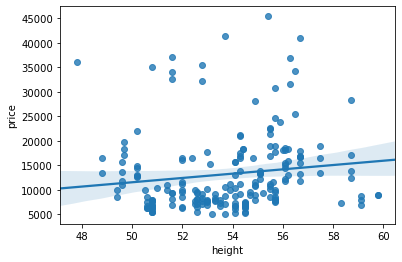

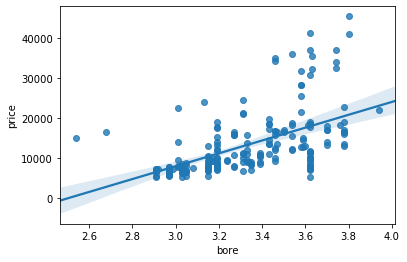

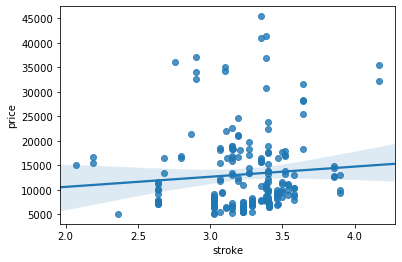

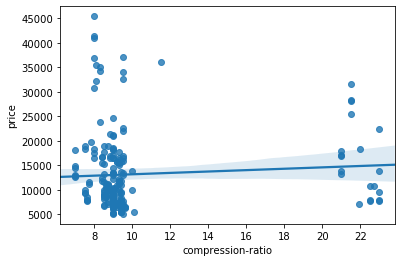

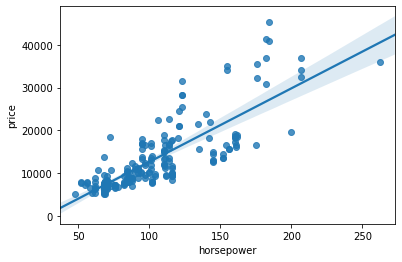

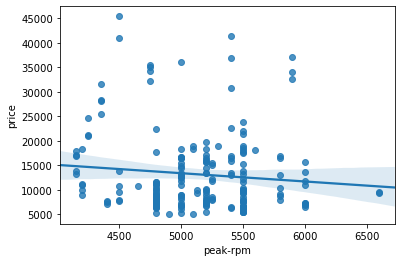

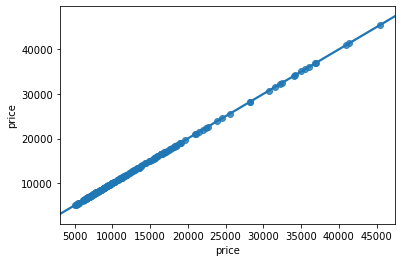

In [10]:
# 8
cols = df.select_dtypes('float64').columns
k = 0
for i in range(1, len(cols)):
    sns.regplot(df[cols[k]], df['price'])
    plt.show()
    k = k + 1

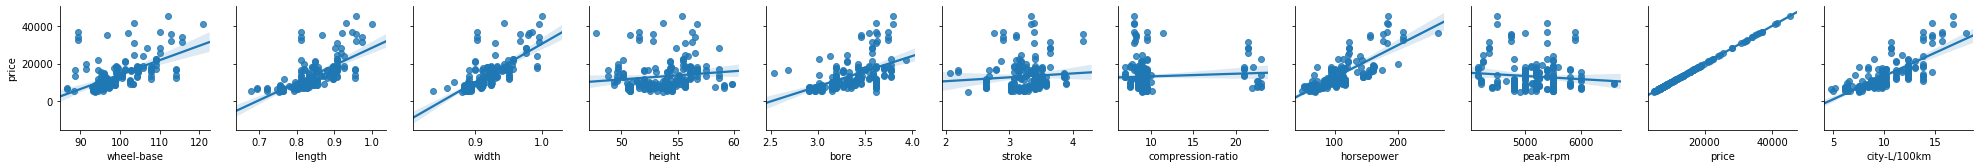

In [11]:
# 9
sns.pairplot(df, x_vars=df.select_dtypes('float64').columns, y_vars=['price'], kind='reg')

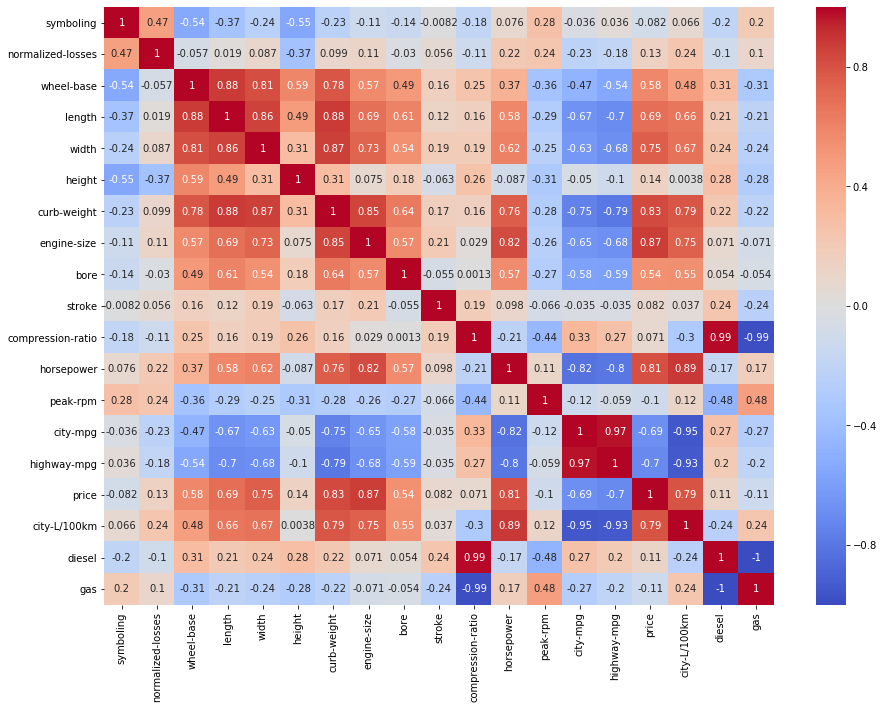

In [12]:
# 10
plt.figure(figsize=(15,11))
ax = sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

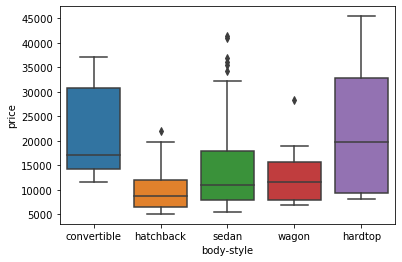

In [13]:
# 11
sns.boxplot(x='body-style', y='price', data=df)

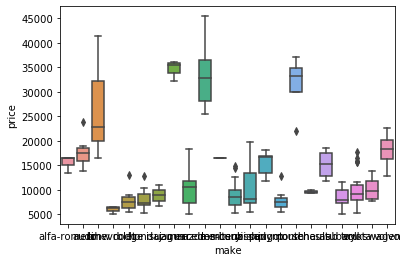

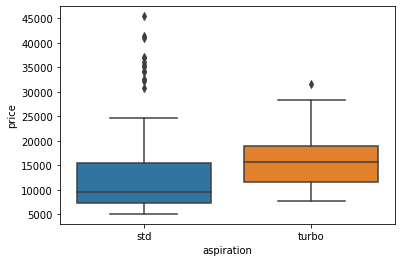

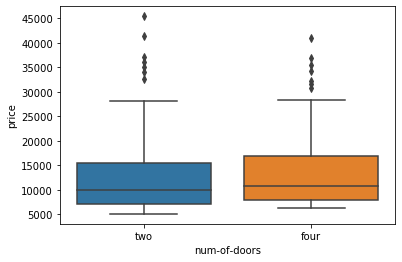

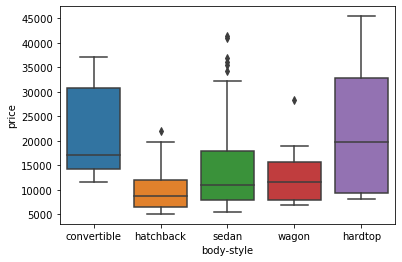

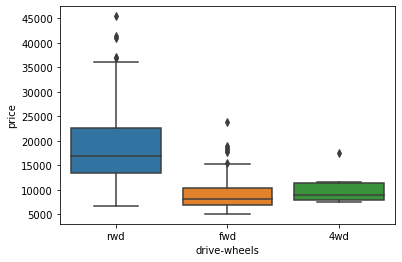

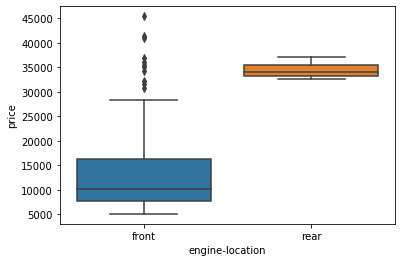

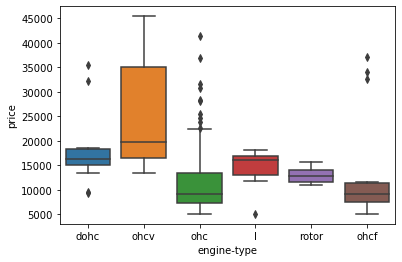

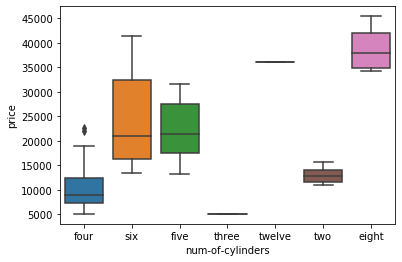

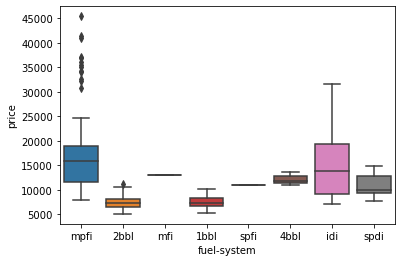

In [14]:
# 12
cols = df.select_dtypes('object').columns
k = 0
for i in range(1, len(cols)):
    sns.boxplot(x=cols[k], y='price', data=df)
    plt.show()
    k = k + 1

In [15]:
# 13
'''
Above barplots infers that how all groups of categorical variables are tightly grouped.
It also infers the outliers present in each group of categorical variables
'''

'\nAbove barplots infers that how all groups of categorical variables are tightly grouped.\nIt also infers the outliers present in each group of categorical variables\n'

In [16]:
# 14
df.select_dtypes('float64').describe()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km
count,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,0.837102,0.915126,53.766667,3.330692,3.256904,10.164279,103.405534,5117.665368,13207.129353,9.944145
std,6.066366,0.059213,0.029187,2.447822,0.268072,0.319256,4.004965,37.365700,478.113805,7947.066342,2.534599
min,86.600000,0.678039,0.837500,47.800000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,4.795918
25%,94.500000,0.801538,0.890278,52.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7775.000000,7.833333
50%,97.000000,0.832292,0.909722,54.100000,3.310000,3.290000,9.000000,95.000000,5125.369458,10295.000000,9.791667
75%,102.400000,0.881788,0.925000,55.500000,3.580000,3.410000,9.400000,116.000000,5500.000000,16500.000000,12.368421
max,120.900000,1.000000,1.000000,59.800000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923


In [17]:
# 15
df.select_dtypes('int64').describe()

,symboling,normalized-losses,curb-weight,engine-size,city-mpg,highway-mpg,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,2555.666667,126.875622,25.179104,30.686567,0.099502,0.900498
std,1.254802,31.99625,517.296727,41.546834,6.423220,6.815150,0.300083,0.300083
min,-2.000000,65.00000,1488.000000,61.000000,13.000000,16.000000,0.000000,0.000000
25%,0.000000,101.00000,2169.000000,98.000000,19.000000,25.000000,0.000000,1.000000
50%,1.000000,122.00000,2414.000000,120.000000,24.000000,30.000000,0.000000,1.000000
75%,2.000000,137.00000,2926.000000,141.000000,30.000000,34.000000,0.000000,1.000000
max,3.000000,256.00000,4066.000000,326.000000,49.000000,54.000000,1.000000,1.000000


In [18]:
# 16
df.select_dtypes('object').describe()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [19]:
# 17
df.groupby('drive-wheels')['price'].mean()
# The average price for each label of drive wheels are computed which infers that drive wheels of type rwd is most costly.

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [20]:
# 18
cat_cols = df.select_dtypes('object').columns
for cat_col in cat_cols:
    print(df.groupby(cat_col)['price'].mean())

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          123

In [21]:
# 19
df.groupby(['drive-wheels', 'body-style'])['price'].mean()

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

with this groupby operation it can be more clear observation that which body style of drive wheels are more costlier, so from the above analysis it can be concluded that convertible body style is more costlier in rwd drive wheels and in fwd drive wheels too convertible holds the maximum price, followed by 4wd drive wheels sedan holds the maximum price.

In [22]:
# 20
df.reset_index().pivot_table(index='drive-wheels',columns='body-style')['price']

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


This pivot operation provides a tabular chart of all types of body style averaged with all types of drive wheels. It can be observe that 4wd of drive wheels two body styles labels are NaN because it does not consists of that type.

In [23]:
# 21
df.reset_index().pivot_table(index='engine-location',columns='engine-type')['price']

engine-type,dohc,l,ohc,ohcf,ohcv,rotor
engine-location,,,,,,
front,18116.416667,14627.583333,11567.358621,8541.25,25098.384615,13020.0
rear,NaN,NaN,NaN,34528.00,NaN,NaN


In [24]:
df.reset_index().pivot_table(index='fuel-system',columns='horsepower-binned')['price']

horsepower-binned,High,Low,Medium
fuel-system,,,
1bbl,NaN,7555.545455,NaN
2bbl,NaN,7433.203125,NaN
4bbl,NaN,12145.000000,NaN
idi,NaN,12047.800000,27209.200000
mfi,NaN,NaN,12964.000000
mpfi,25899.130435,11871.904762,15716.659574
spdi,NaN,NaN,10990.444444
spfi,NaN,11048.000000,NaN


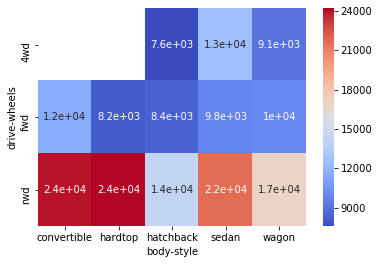

In [25]:
# 22
ax = sns.heatmap(df.reset_index().pivot_table(index='drive-wheels',
                                              columns='body-style')['price'], 
                 annot=True, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [26]:
# 23
from scipy.stats import pearsonr
corr, _ = pearsonr(df['wheel-base'], df['price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.585


Wheel base and price are positive correlated i.e. if price increases wheel-base will also increased

In [27]:
# 24
from scipy.stats import f_oneway
f_oneway(df['price'][df['drive-wheels'] == '4wd'],
         df['price'][df['drive-wheels'] == 'fwd'],
         df['price'][df['drive-wheels'] == 'rwd'])

F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577151245e-23)

From the above one way anova on drive-wheels it can be inferred that different groups of drive-wheels are statistically significant with the price